<IPython.core.display.Javascript object>


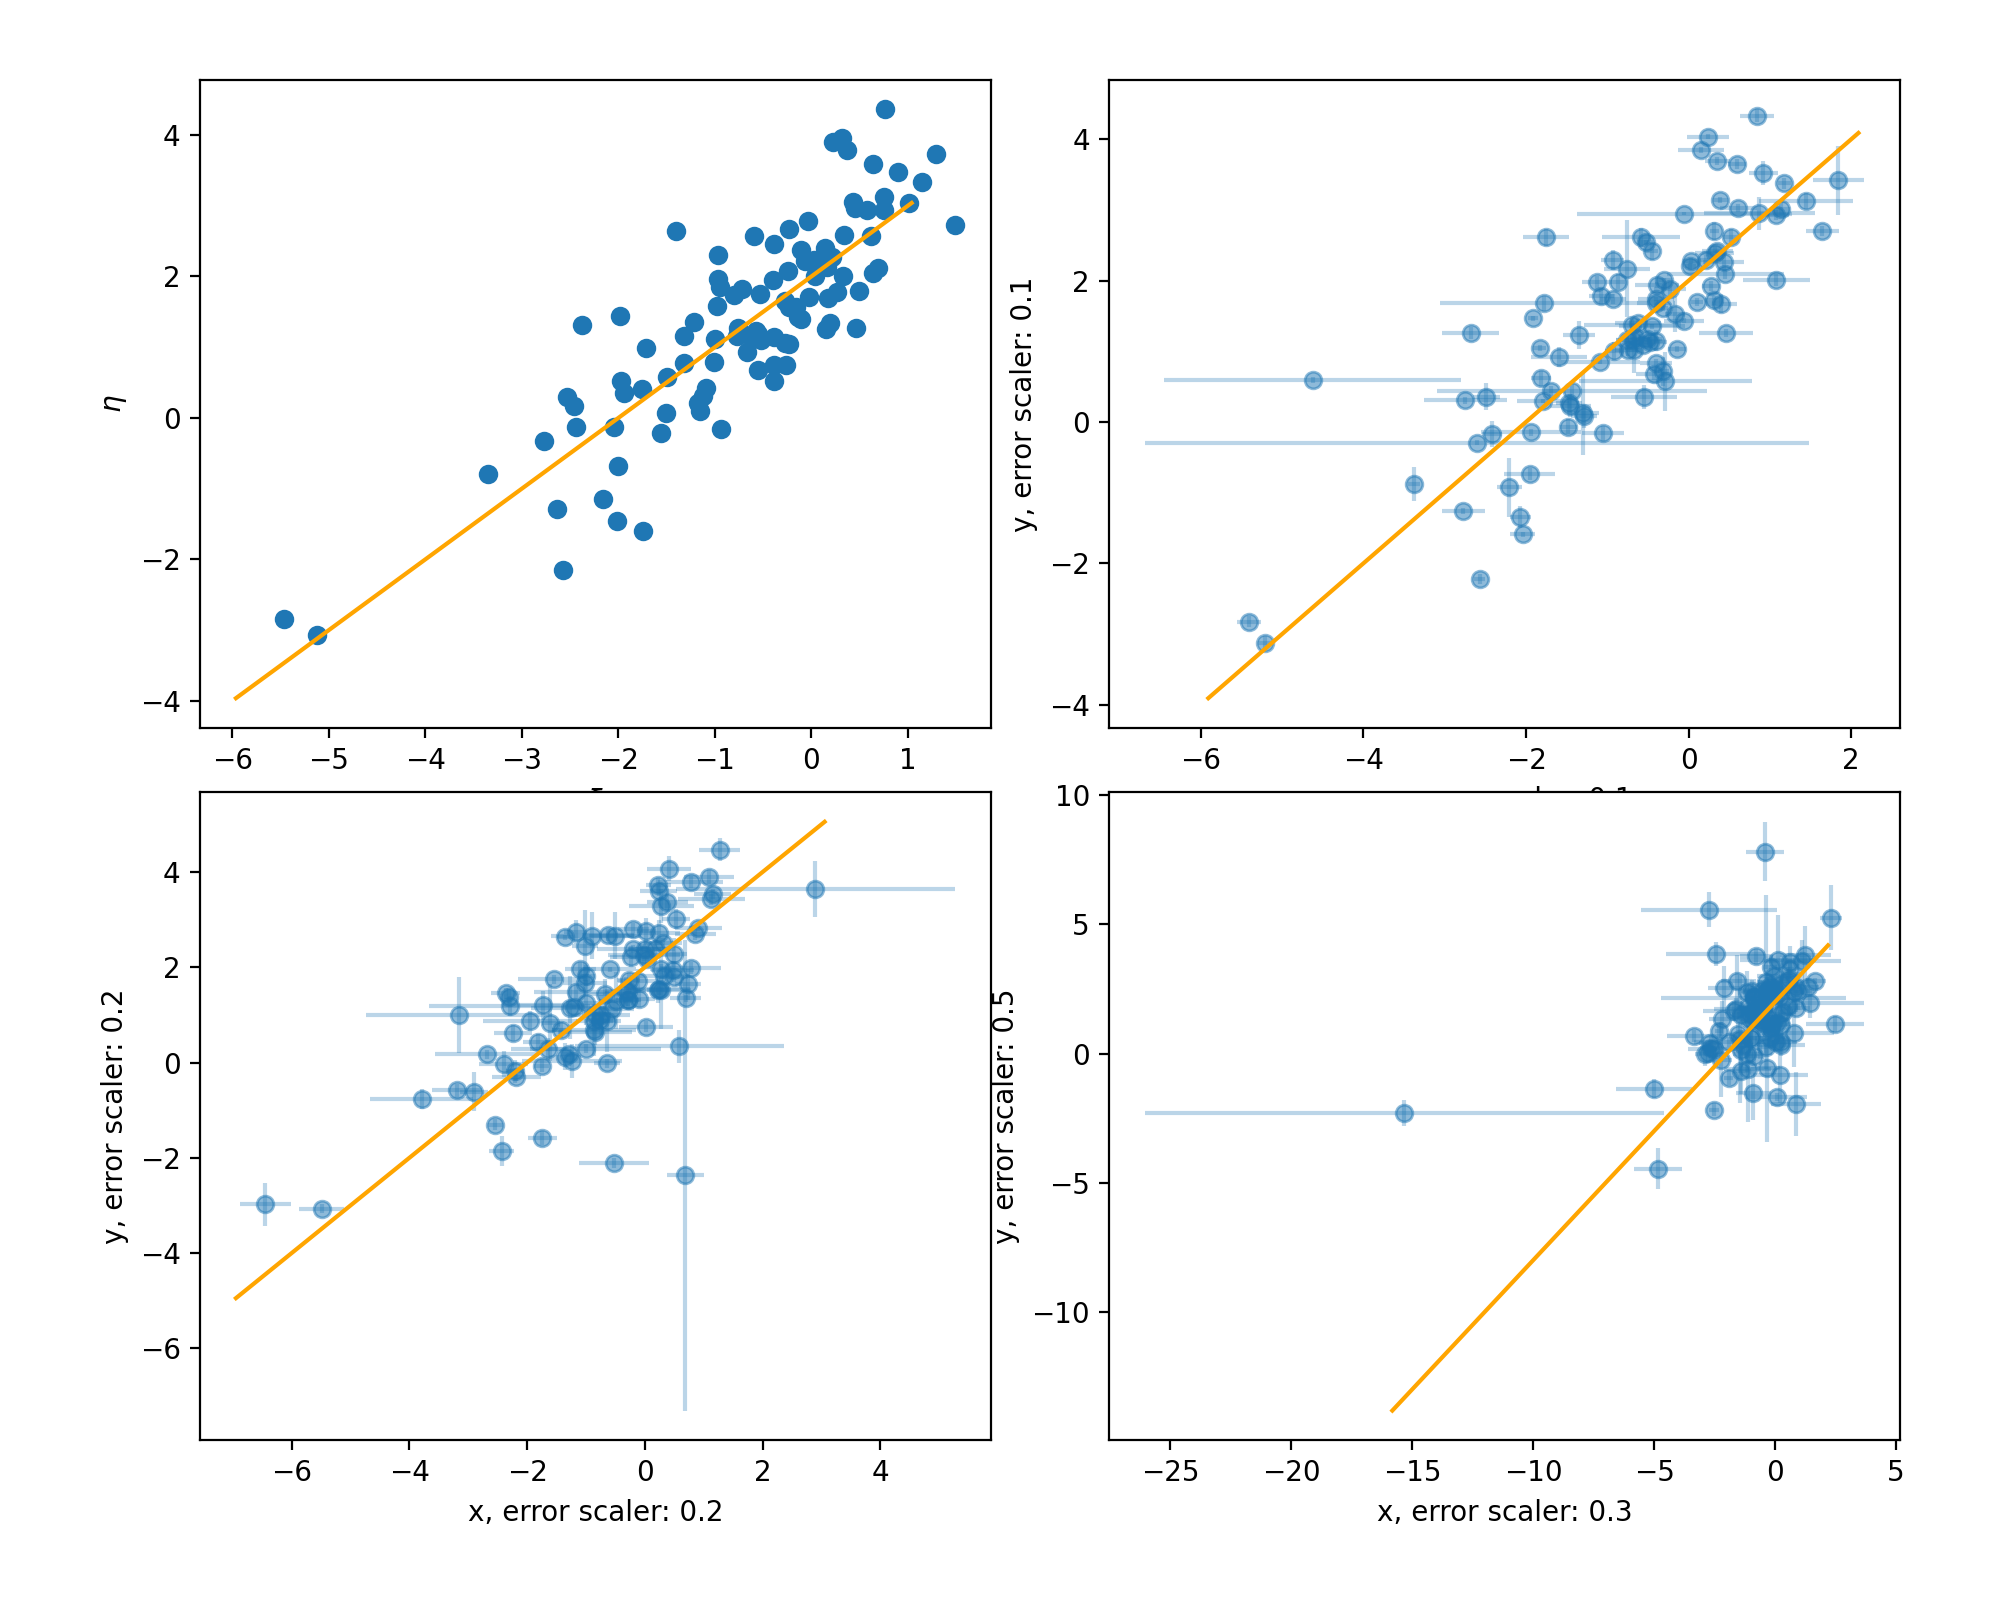

In [5]:
%matplotlib notebook
from astroML.datasets import simulation_kelly
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

ksi, eta, xi, yi, xi_error, yi_error, alpha_in, beta_in = simulation_kelly(size=100, scalex=0.2, scaley=0.2, alpha=2, beta=1, epsilon=(0, 0.75))
ksi_0 = np.arange(np.min(ksi) - 0.5, np.max(ksi) + 0.5)
eta_0 = alpha_in + ksi_0 * beta_in

figure = plt.figure(figsize=(10, 8))
figure.subplots_adjust(left=0.1, right=0.95,
                       bottom=0.1, top=0.95,
                       hspace=0.1, wspace=0.15)
ax = figure.add_subplot(221)
ax.scatter(ksi, eta)
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\eta$')

ax.plot(ksi_0, eta_0, color='orange')

for scalex, scaley, axn in [(0.1, 0.1, 222), (0.3, 0.5, 224), (0.2, 0.2, 223)]:
    _, _, xi, yi, xi_error, yi_error, _, _ = simulation_kelly(size=100, scalex=scalex, scaley=scaley,
                                                              alpha=alpha_in, beta=beta_in, ksi=ksi, eta=eta)    
    ax = figure.add_subplot(axn)

    ax.scatter(xi[0], yi, alpha=0.5)
    ax.errorbar(xi[0], yi, xerr=xi_error[0], yerr=yi_error, alpha=0.3, ls='')
    ax.set_xlabel(f'x, error scaler: {scalex}')
    ax.set_ylabel(f'y, error scaler: {scaley}')

    x0 = np.arange(np.min(xi) - 0.5, np.max(xi) + 0.5)
    y0 = alpha_in + x0 * beta_in
    ax.plot(x0, y0, color='orange')

In [6]:
from astroML.linear_model import LinearRegressionwithErrors

linreg_xy_err = LinearRegressionwithErrors()
linreg_xy_err.fit(xi, yi, yi_error, xi_error)

NameError: name 'pm' is not defined